In [90]:
import pandas as pd

df = pd.read_excel('Sponsored Updates - LMS.xlsx', index_col=None, header=0, dtype={'CAMPAIGN_ID': str})
del df['COMPANY']
df['CTR'] = round((df['CLICKS'] / df['IMPRESSIONS']) * 100, 2)
df['MONTH'] = df['DAY'].dt.month
df['YEAR'] = df['DAY'].dt.year
df['DAY_OF_MONTH'] = df['DAY'].dt.day
df['DAY_OF_WEEK'] = df['DAY'].dt.day_name()

df = df.astype({'DAY_OF_MONTH': 'str', 'YEAR': 'str', 'MONTH': 'str'})
df.head()

,DAY,CAMPAIGN_ID,CONTENT_SHARED,IMPRESSIONS,CLICKS,LIKES,COMMENTS,SHARES,RESHARES,CTR,MONTH,YEAR,DAY_OF_MONTH,DAY_OF_WEEK
0,2017-03-31,3551,Picture,52190,1396,138,104,83,14,2.67,3,2017,31,Friday
1,2017-03-31,2344,Video,15765,1234,149,94,76,2,7.83,3,2017,31,Friday
2,2017-03-30,2918,Video,78998,1204,122,167,119,30,1.52,3,2017,30,Thursday
3,2017-03-30,4503,Article,19506,1492,196,108,27,40,7.65,3,2017,30,Thursday
4,2017-03-29,2735,Picture,71371,811,102,67,18,3,1.14,3,2017,29,Wednesday


In [111]:
df.groupby(['YEAR', 'MONTH', 'DAY_OF_MONTH', 'CONTENT_SHARED']).sum().filter(regex='^(?!CTR).*$', axis='columns')

IMPRESSIONS  CLICKS  LIKES  COMMENTS  \
YEAR MONTH DAY_OF_MONTH CONTENT_SHARED                                         
2016 1     1            Article              143839    3383    515       406   
           10           Picture              120733    1615    264       281   
                        Video                 14981     455    136       187   
           11           Article               32164    1224    131       135   
                        Picture               69308    1908    305       351   
...                                             ...     ...    ...       ...   
2017 3     8            Article               24481    1440    193       107   
                        Picture               13940     740    144        85   
                        Video                 75780     863    158       136   
           9            Article              103686    1470    280       278   
                        Picture               29119     671    196        65   

                                        SHARES  RESHARES  
YEAR MONTH DAY_OF_MONTH CONTENT_SHARED                    
2016 1     1            Article            275       115  
           10           Picture            214        58  
                        Video              162        23  
           11           Article             75        44  
                        Picture             90        35  
...                                        ...       ...  
2017 3     8            Article            163        24  
                        Picture            103         2  
                        Video               87        50  
           9            Article            280        79  
                        Picture             61        27  

[974 rows x 6 columns]

In [112]:
df.groupby(['CONTENT_SHARED']).sum().filter(regex='^(?!CTR).*$', axis='columns')

,IMPRESSIONS,CLICKS,LIKES,COMMENTS,SHARES,RESHARES
CONTENT_SHARED,,,,,,
Article,22923558,479534,76241,62591,53213,12216
Picture,23962154,482333,77144,64799,52004,12740
Video,21882500,465449,72370,60063,50663,11646


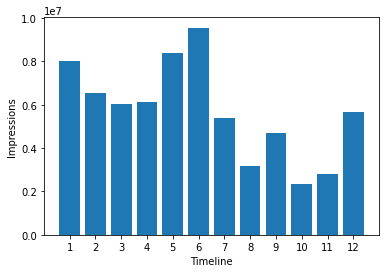

In [118]:
import matplotlib.pyplot as plt
months = range(1,13)
plt.bar(months, df.groupby(['DAY']).sum()['IMPRESSIONS'])
plt.xticks(months)
plt.ylabel('Impressions')
plt.xlabel('Timeline')
plt.show()